## Public Attacker-Owned vs. Compromised Classifier W2

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('public_ac_n_c_final.csv')

In [4]:
df.head(5)

,Unnamed: 0,fqdn,vt_duration,vt_count,vt_mal_count,vt_ratio,firstseen,lastseen,#query,#ip,...,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#query_parameters,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year
0,0,bankofamericatec.webcindario.com,9417600.0,12.0,12.0,1.0,NaN,NaN,NaN,NaN,...,3.299454,0.0,81,1,2,1,0,0,1000000.0,False
1,1,ftp.tamraj.fartit.com,41644800.0,54.0,54.0,1.0,2017-04-12 03:57:25,2020-09-29 23:10:27,234833.0,2.0,...,0.000000,0.0,62,1,3,0,0,0,1000000.0,False
2,2,bluewin5.godaddysites.com,43891200.0,49.0,49.0,1.0,2018-06-22 10:01:56,2020-08-11 19:36:27,590.0,1.0,...,0.000000,0.0,66,1,2,0,0,0,1000000.0,False
3,3,appleid-applepage8.serveirc.com,4147200.0,10.0,10.0,1.0,2019-05-05 00:01:14,2019-05-08 18:08:38,132.0,1.0,...,0.000000,0.0,82,1,2,1,0,0,1000000.0,False
4,4,paypl-secureded.000webhostapp.com,2764800.0,4.0,4.0,1.0,NaN,NaN,NaN,NaN,...,0.489898,0.0,81,1,2,0,0,0,1000000.0,False


In [5]:
df.columns

Index(['Unnamed: 0', 'fqdn', 'vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', 'firstseen', 'lastseen', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'soa_matching', 'label', 'positives',
       'response_code', 'rlength', 'url_after_redirects', 'url',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'is_idn', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'],
      dtype='object')

In [6]:
df = df[['fqdn', 'vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', 'firstseen', 'lastseen', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'soa_matching', 'label', 'positives',
       'response_code', 'rlength', 'url_after_redirects', 'url',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

In [7]:
df.dtypes

fqdn                                                    object
vt_duration                                            float64
vt_count                                               float64
vt_mal_count                                           float64
vt_ratio                                               float64
firstseen                                               object
lastseen                                                object
#query                                                 float64
#ip                                                    float64
#ns                                                    float64
ns_matching                                             object
#soa                                                   float64
soa_matching                                            object
label                                                    int64
positives                                                int64
response_code                                          

In [8]:
df.isnull().sum()

fqdn                                                     0
vt_duration                                            133
vt_count                                               133
vt_mal_count                                           133
vt_ratio                                               133
firstseen                                              705
lastseen                                               705
#query                                                 705
#ip                                                    705
#ns                                                    705
ns_matching                                            705
#soa                                                   705
soa_matching                                           705
label                                                    0
positives                                                0
response_code                                            0
rlength                                                 

In [9]:
df = df.fillna(0)

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['ns_matching'] = label_encoder.fit_transform(df['ns_matching'])
# df['soa_matching'] = label_encoder.fit_transform(df['soa_matching'])
df['response_code'] = label_encoder.fit_transform(df['response_code'])
df['rlength'] = label_encoder.fit_transform(df['rlength'])
df['url_after_redirects'] = label_encoder.fit_transform(df['url_after_redirects'])
df['domain_malicious'] = label_encoder.fit_transform(df['domain_malicious'])
df['suspicious_tld'] = label_encoder.fit_transform(df['suspicious_tld'])
# df['is_idn'] = label_encoder.fit_transform(df['is_idn'])
df['label'] = label_encoder.fit_transform(df['label'])

In [11]:
df.dtypes

fqdn                                                    object
vt_duration                                            float64
vt_count                                               float64
vt_mal_count                                           float64
vt_ratio                                               float64
firstseen                                               object
lastseen                                                object
#query                                                 float64
#ip                                                    float64
#ns                                                    float64
ns_matching                                              int64
#soa                                                   float64
soa_matching                                            object
label                                                    int64
positives                                                int64
response_code                                          

In [12]:
df.isnull().sum()

fqdn                                                   0
vt_duration                                            0
vt_count                                               0
vt_mal_count                                           0
vt_ratio                                               0
firstseen                                              0
lastseen                                               0
#query                                                 0
#ip                                                    0
#ns                                                    0
ns_matching                                            0
#soa                                                   0
soa_matching                                           0
label                                                  0
positives                                              0
response_code                                          0
rlength                                                0
url_after_redirects            

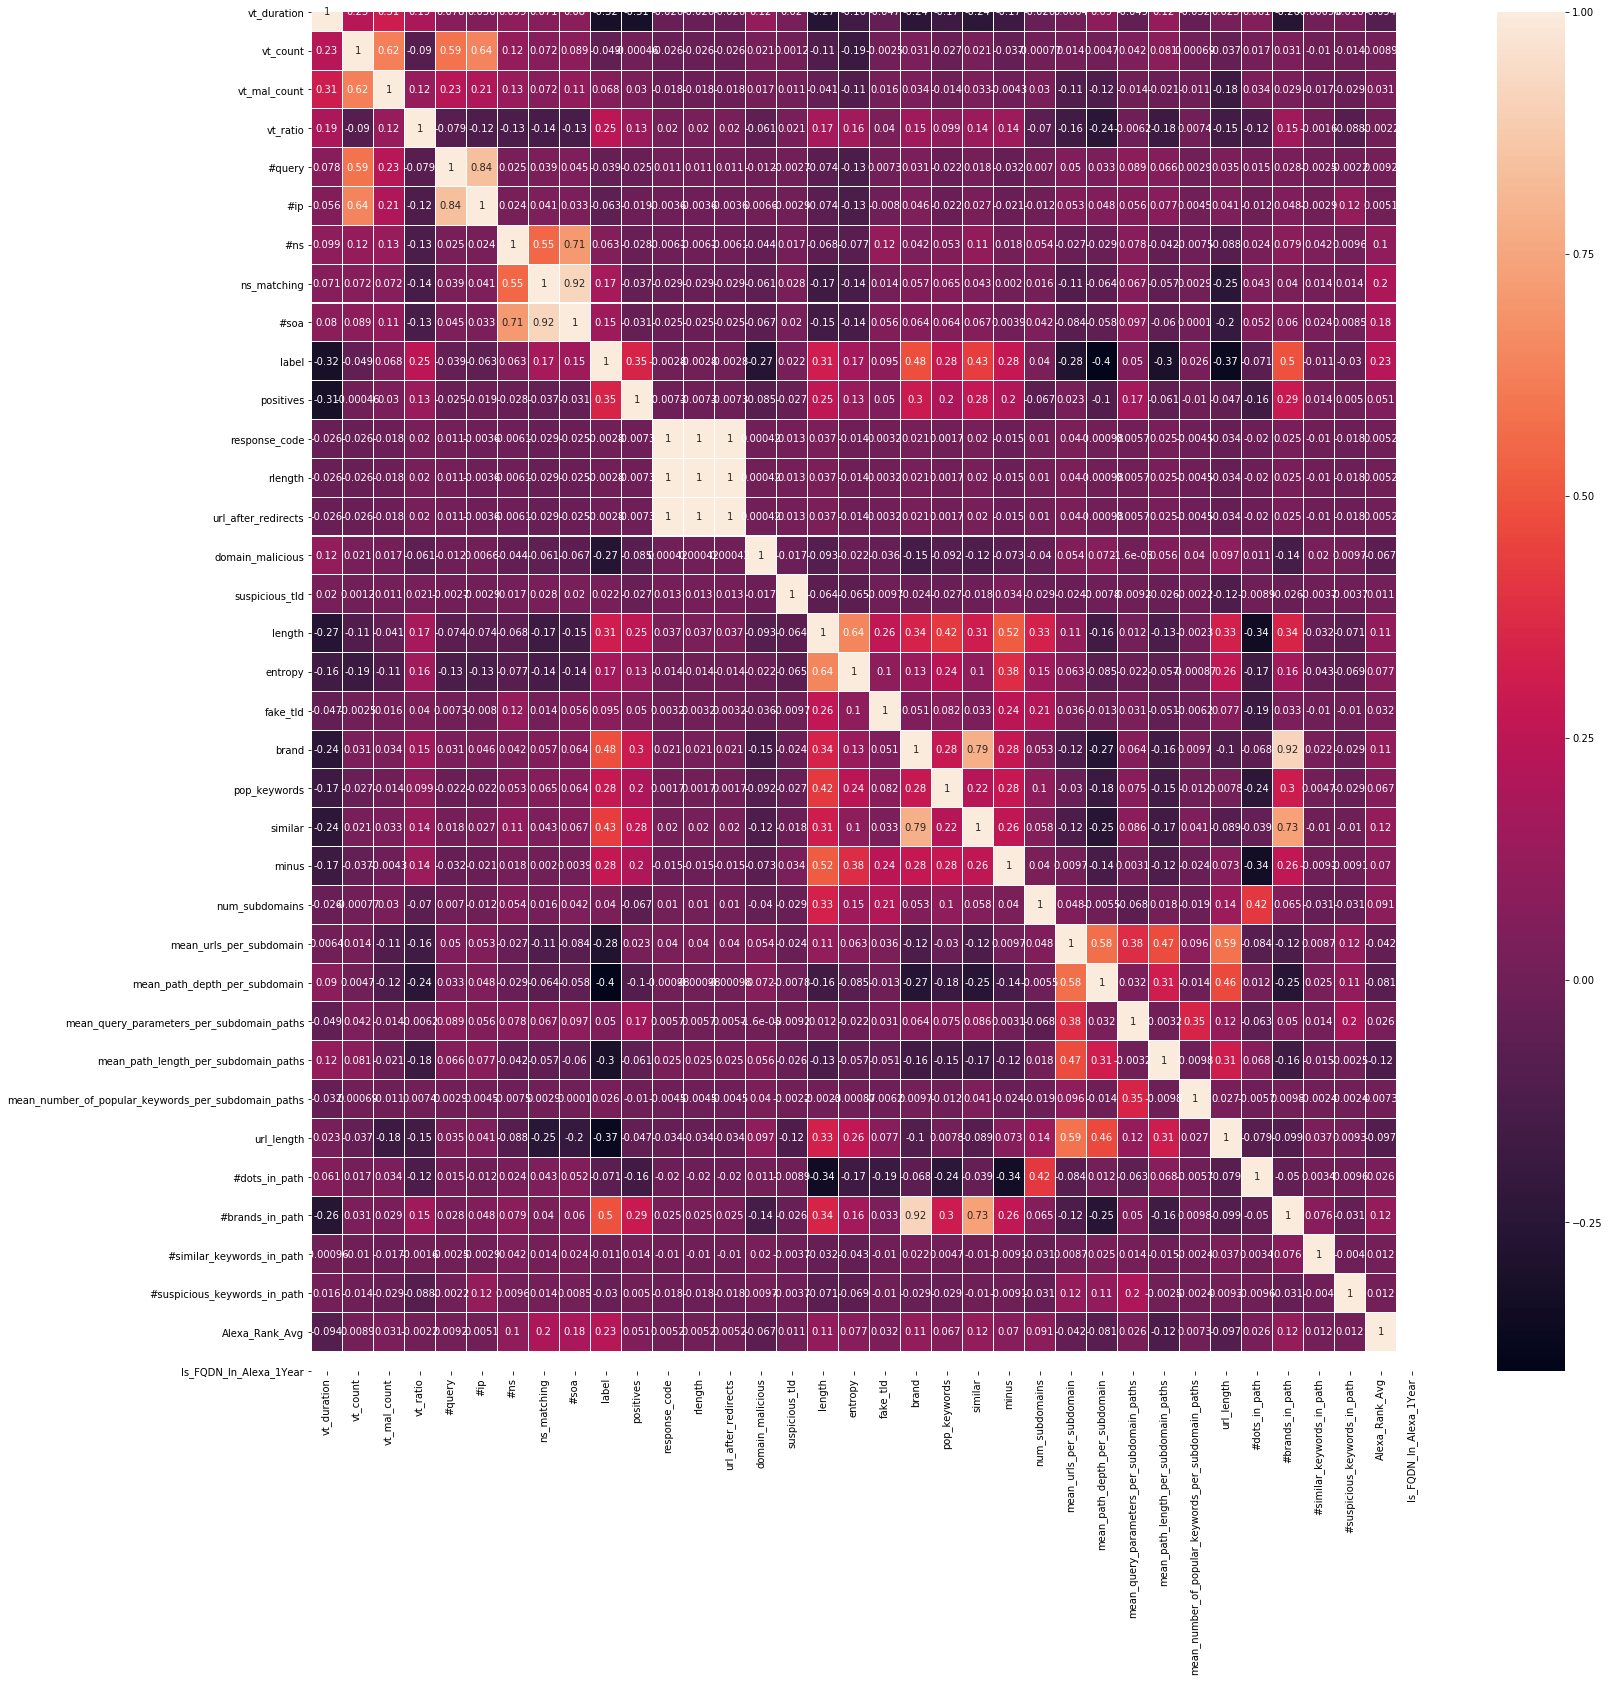

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True ,linewidths=.05)
# plt.savefig('attacker_created_compromised_corr_gt1.png')
plt.show()

In [14]:
df.loc[df.label==0].shape

(613, 41)

In [15]:
df.loc[df.label==1].shape

(1157, 41)

In [16]:
data = []
count =0 
for index, row in df.iterrows():
    if row.label==0:
        count+=1
    if count == 613:
        break
    data.append(row)
data = pd.DataFrame(data)

In [17]:
data

,fqdn,vt_duration,vt_count,vt_mal_count,vt_ratio,firstseen,lastseen,#query,#ip,#ns,...,mean_query_parameters_per_subdomain_paths,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year
0,bankofamericatec.webcindario.com,9417600.0,12.0,12.0,1.0,0,0,0.0,0.0,0.0,...,1.12,3.299454,0.0,81,2,1,0,0,1000000.0,False
1,ftp.tamraj.fartit.com,41644800.0,54.0,54.0,1.0,2017-04-12 03:57:25,2020-09-29 23:10:27,234833.0,2.0,2.0,...,0.00,0.000000,0.0,62,3,0,0,0,1000000.0,False
2,bluewin5.godaddysites.com,43891200.0,49.0,49.0,1.0,2018-06-22 10:01:56,2020-08-11 19:36:27,590.0,1.0,1.0,...,0.00,0.000000,0.0,66,2,0,0,0,1000000.0,False
3,appleid-applepage8.serveirc.com,4147200.0,10.0,10.0,1.0,2019-05-05 00:01:14,2019-05-08 18:08:38,132.0,1.0,1.0,...,0.00,0.000000,0.0,82,2,1,0,0,1000000.0,False
4,paypl-secureded.000webhostapp.com,2764800.0,4.0,4.0,1.0,0,0,0.0,0.0,0.0,...,0.00,0.489898,0.0,81,2,0,0,0,1000000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,mfacebook.blogspot.com.br,43372800.0,79.0,79.0,1.0,2019-10-24 01:26:13,2019-10-24 01:26:13,2.0,1.0,1.0,...,0.00,0.000000,0.0,66,3,1,0,0,1000000.0,False
1765,w-orldknowledge.blogspot.com,5270400.0,2.0,2.0,1.0,0,0,0.0,0.0,0.0,...,0.00,17.146430,0.0,81,2,0,0,0,1000000.0,False
1766,bloggerxtutorials.blogspot.com,42595200.0,28.0,28.0,1.0,0,0,0.0,0.0,0.0,...,0.00,15.278726,0.0,81,2,0,0,0,2718.0,False
1767,defensegames.tistory.com,43286400.0,11.0,11.0,1.0,2011-08-25 02:57:46,2020-09-24 19:41:59,12650.0,6.0,2.0,...,0.00,14.481202,0.0,76,2,0,0,0,1000000.0,False


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[['vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'positives',
       'response_code', 'rlength', 'url_after_redirects',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']], data.label, test_size = 0.20, random_state = 0)

In [19]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.711864406779661  precision :  0.7366548042704626  recall :  0.8808510638297873
Decision Tree Classification : 0.9378531073446328  precision :  0.9650655021834061  recall :  0.9404255319148936
Gradient Boosting Classification : 0.9717514124293786  precision :  0.9707112970711297  recall :  0.9872340425531915
Ada Boosting Classification : 0.9576271186440678  precision :  0.9545454545454546  recall :  0.9829787234042553
Extra Tree Classification : 0.9322033898305084  precision :  0.9414225941422594  recall :  0.9574468085106383
K-Neighbors Classification : 0.7401129943502824  precision :  0.8042553191489362  recall :  0.8042553191489362
Support Vector Classification : 0.7005649717514124  precision :  0.7380073800738007  recall :  0.851063829787234
RandomForestClassifier :  0.9576271186440678  precision :  0.9621848739495799  recall :  0.9744680851063829


In [20]:
RFC = RandomForestClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

n_estimators = best_logmodel.best_estimator_.get_params()['n_estimators']
max_depth = best_logmodel.best_estimator_.get_params()['max_depth']

print('Best Estimators:', n_estimators)
print('Best Max Depth:', max_depth)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:   27.3s
[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:   43.9s finished


Best Estimators: 101
Best Max Depth: 201


In [22]:
RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [23]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.9548022598870056  precision :  0.9543568464730291  recall :  0.9787234042553191 

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       119
           1       0.95      0.98      0.97       235

    accuracy                           0.95       354
   macro avg       0.96      0.94      0.95       354
weighted avg       0.95      0.95      0.95       354



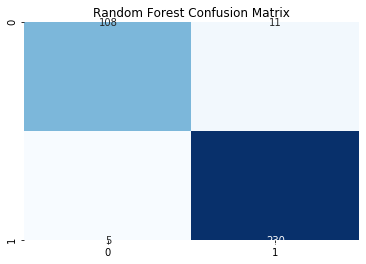

In [24]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt2.png')
plt.show()

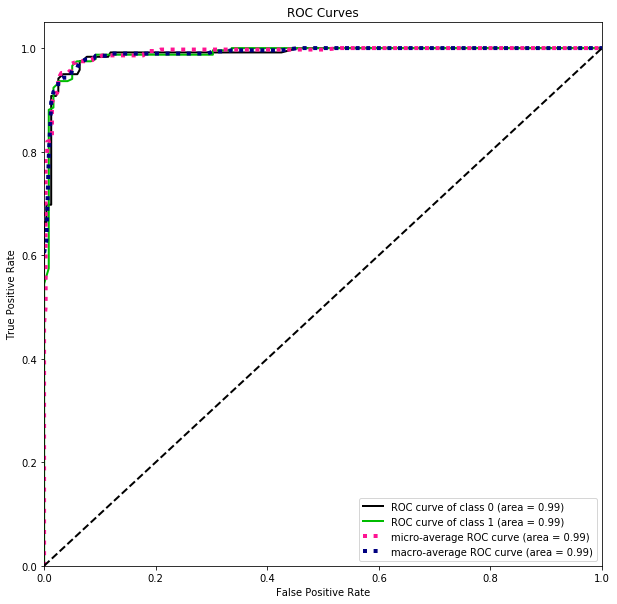

In [25]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
plt.savefig('attacker_created_compromised_classifier_roc_gt2.png')
plt.show()

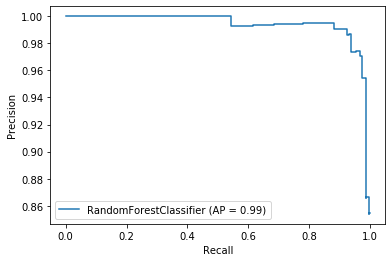

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt2.png')

Feature ranking:
1. feature 13 - domain_malicious (0.21214487934376292)
2. feature 24 - mean_path_depth_per_subdomain (0.12119880083214198)
3. feature 26 - mean_path_length_per_subdomain_paths (0.07466793549813942)
4. feature 23 - mean_urls_per_subdomain (0.05646386505437128)
5. feature 0 - vt_duration (0.05265286734193955)
6. feature 18 - brand (0.05137134080232988)
7. feature 30 - #brands_in_path (0.05109333096350423)
8. feature 28 - url_length (0.03409521433944912)
9. feature 15 - length (0.03129132145719706)
10. feature 9 - positives (0.027891174613589812)
11. feature 2 - vt_mal_count (0.026258067006627722)
12. feature 1 - vt_count (0.02601433843014747)
13. feature 20 - similar (0.025357202749135322)
14. feature 4 - #query (0.024339757193094592)
15. feature 5 - #ip (0.02360466197025307)
16. feature 16 - entropy (0.02304695404713022)
17. feature 11 - rlength (0.019365493043093446)
18. feature 21 - minus (0.018509916243859496)
19. feature 3 - vt_ratio (0.018420867116000498)
20. featu

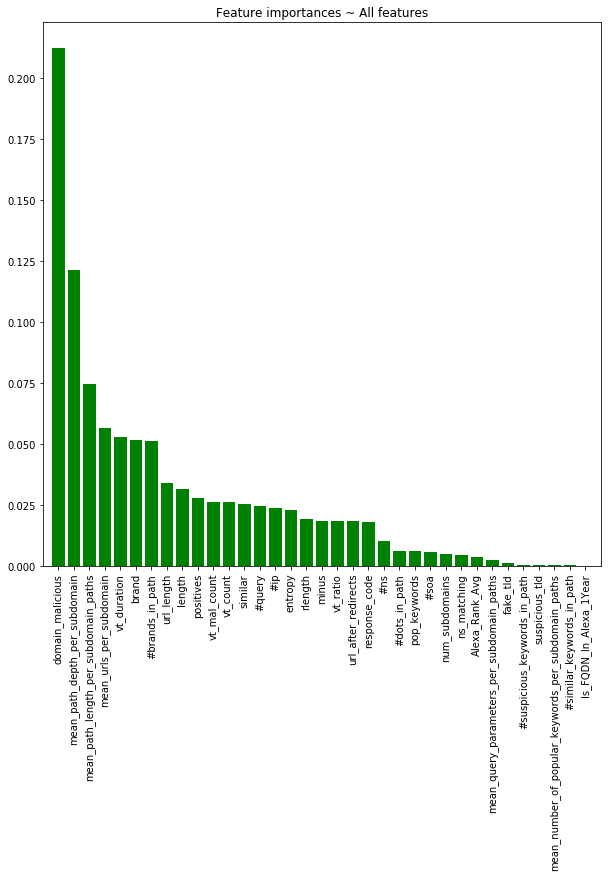

In [27]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'positives',
       'response_code', 'rlength', 'url_after_redirects',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('attacker_created_compromised_classifier_feature_importances_gt2.png')
plt.show()

In [28]:
# import pickle
# pickle.dump(RFC,open('attacker_created_compromised_classifier_.pickle','wb'))